<a href="https://colab.research.google.com/github/Sina-Akhavi/bitcoin-timeseries-Forecasting/blob/main/arima_bitcoin_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install yfinance

In [2]:
import yfinance as yf
df = yf.download('BTC-USD')


[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,46970.503906,42746192015
2024-01-09,46987.640625,47893.699219,45244.714844,46139.730469,46139.730469,39821290992
2024-01-10,46121.539062,47647.222656,44483.152344,46627.777344,46627.777344,50114613298
2024-01-11,46656.074219,48969.371094,45678.644531,46368.585938,46368.585938,45833734549
2024-01-12,46354.792969,46420.210938,45841.410156,45841.410156,45841.410156,43611648000


In [5]:
df = df[['Close']]
df

,Close
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2024-01-08,46970.503906
2024-01-09,46139.730469
2024-01-10,46627.777344


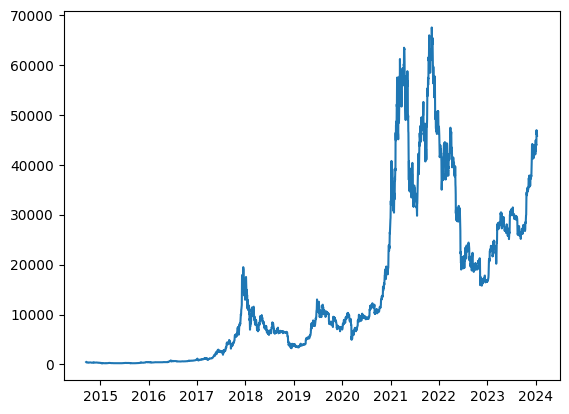

In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.plot(df.index, df['Close'])
plt.show()

In [25]:
df = df[:2146]


num_training_examples = int(0.80 * len(df))
num_training_examples

training_examples = df[:num_training_examples]['Close']
test_examples = df[num_training_examples:]['Close']

test_examples

Date
2019-05-30     8319.472656
2019-05-31     8574.501953
2019-06-01     8564.016602
2019-06-02     8742.958008
2019-06-03     8208.995117
                  ...     
2020-07-28    10912.823242
2020-07-29    11100.467773
2020-07-30    11111.213867
2020-07-31    11323.466797
2020-08-01    11759.592773
Name: Close, Length: 430, dtype: float64

# Getting familiar with the dataset

- Training example
- start date: 2014-09-17
- end date: 2019-05-29
- number of training examples: 1716


- Test examples
- start date: 2019-05-30
- ending date: 2020-08-01
- number of testing examples: 430

In [14]:
print('training examples characteristics: \n')
print('number of training examples: ', len(training_examples))
print('start date: ', training_examples.index[0])
print('last date: ', training_examples.index[-1])

training examples characteristics: 

number of training examples:  1716
start date:  2014-09-17 00:00:00
last date:  2019-05-29 00:00:00


In [15]:
print('test examples characteristics: \n')
print('number of test examples: ', len(test_examples))
print('start date: ', test_examples.index[0])
print('last date: ', test_examples.index[-1])

test examples characteristics: 

number of test examples:  430
start date:  2019-05-30 00:00:00
last date:  2020-08-01 00:00:00


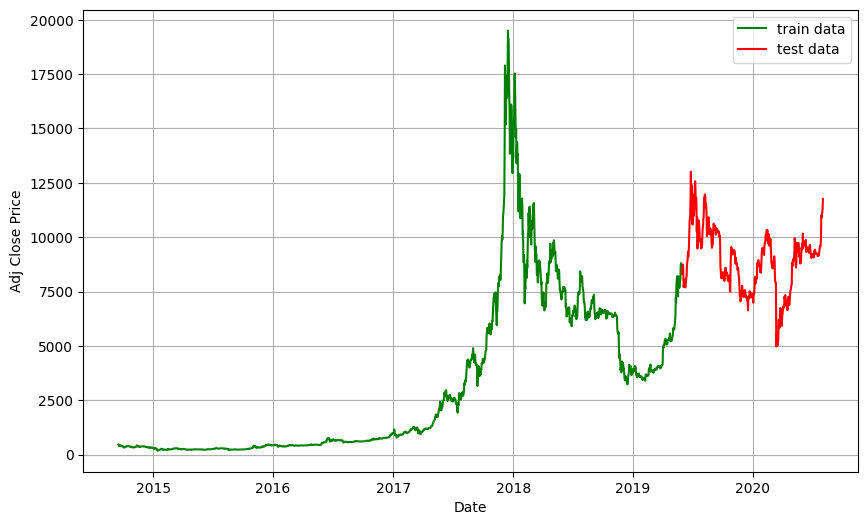

In [16]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')

plt.plot(training_examples, 'green', label='train data')
plt.plot(test_examples, 'red', label='test data')
plt.legend()

plt.show()

In [17]:
predictions = list()
history = [x for x in training_examples]
originals = list()

num_tests = len(test_examples)
for i in range(num_tests):

  model = ARIMA(history, order=(4, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()

  pred_value = output[0]
  original_value = test_examples[i]
  history.append(original_value)

  print('predicted: ', pred_value, 'expected: ', original_value)

  predictions.append(pred_value)
  originals.append(original_value)

predicted:  8623.15759537603 expected:  8319.47265625
predicted:  8289.73971412478 expected:  8574.501953125
predicted:  8608.981072131724 expected:  8564.0166015625
predicted:  8562.866525969648 expected:  8742.9580078125
predicted:  8771.720549399195 expected:  8208.9951171875
predicted:  8151.655211099928 expected:  7707.77099609375
predicted:  7684.692371450375 expected:  7824.2314453125
predicted:  7845.911922278939 expected:  7822.0234375
predicted:  7853.547469309224 expected:  8043.951171875
predicted:  8086.115190074009 expected:  7954.1279296875
predicted:  7934.461870065362 expected:  7688.0771484375
predicted:  7668.165295225819 expected:  8000.32958984375
predicted:  8020.7382083178245 expected:  7927.71435546875
predicted:  7921.149694477713 expected:  8145.857421875
predicted:  8174.105958948049 expected:  8230.923828125
predicted:  8214.408301159958 expected:  8693.8330078125
predicted:  8725.991204856897 expected:  8838.375
predicted:  8822.485318867917 expected:  8994

In [18]:
print('history length=', len(history))
print('predictions length=', len(predictions))
print('originals length=', len(history))

history length= 2146
predictions length= 430
originals length= 2146


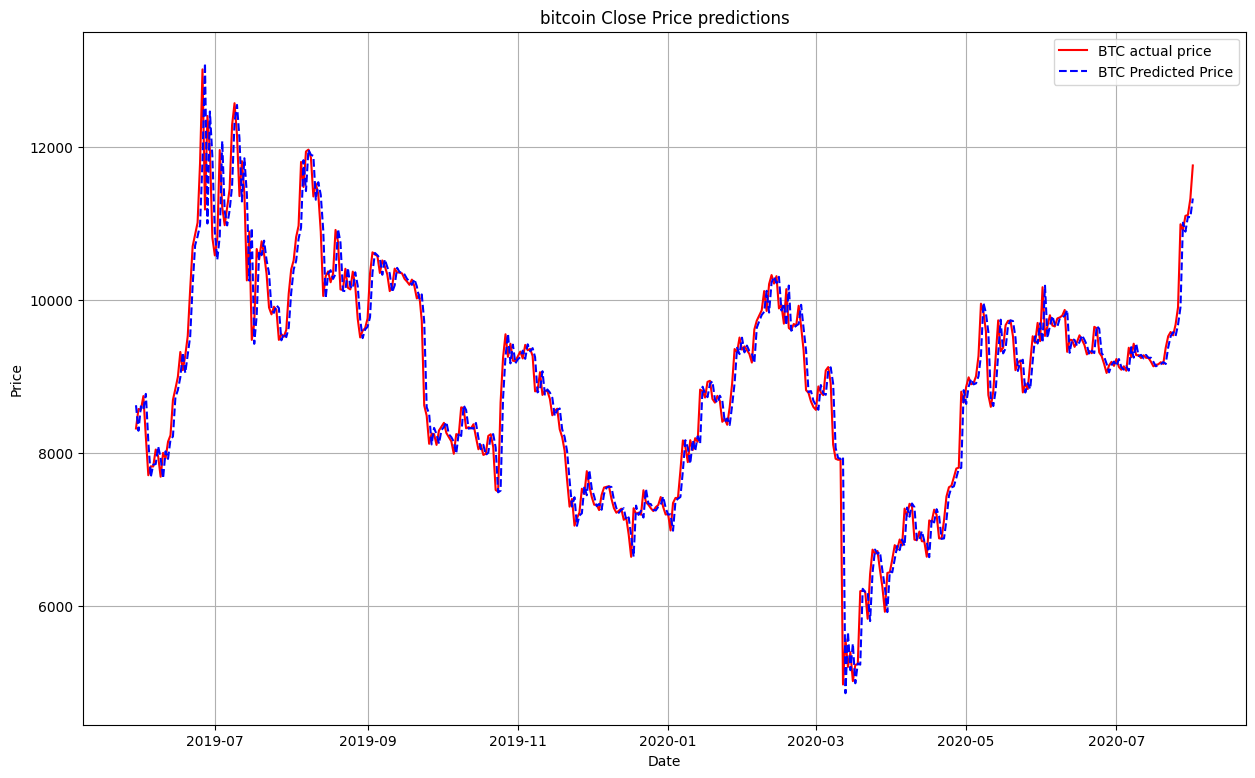

In [19]:
# -------------------- visualizing result --------------------
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[num_training_examples:].index

plt.plot(date_range, originals, color='red', label='BTC actual price')
plt.plot(date_range, predictions, color = 'blue', linestyle='dashed', label='BTC Predicted Price')

plt.title('bitcoin Close Price predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tools.eval_measures import rmse


def calculate_mape(actual, predicted) -> float:

    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)

    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)


mse = mean_squared_error(originals, predictions)
mae = mean_absolute_error(originals, predictions)
r_mse = rmse(originals, predictions)

print('MSE=', mse)
print('MAE=', mae)
print('RMSE=', r_mse)
print('MAPE=', calculate_mape(originals, predictions))


MSE= 132749.75181284643
MAE= 228.06114753843553
RMSE= 364.3483934544606
MAPE= 2.59
